In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
data=pd.read_csv("KaggleV2-May-2016.csv")

In [3]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

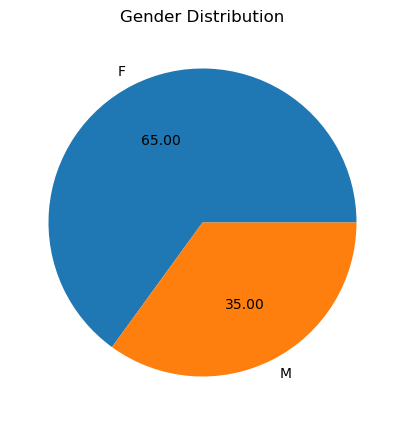

In [6]:
#gender distribution 
gender_counts=data['Gender'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(gender_counts,labels=gender_counts.index,autopct='%.2f')
plt.title("Gender Distribution")
plt.show()

In [7]:
gender_counts=data['Gender'].value_counts()

In [8]:
print(gender_counts)

Gender
F    71840
M    38687
Name: count, dtype: int64


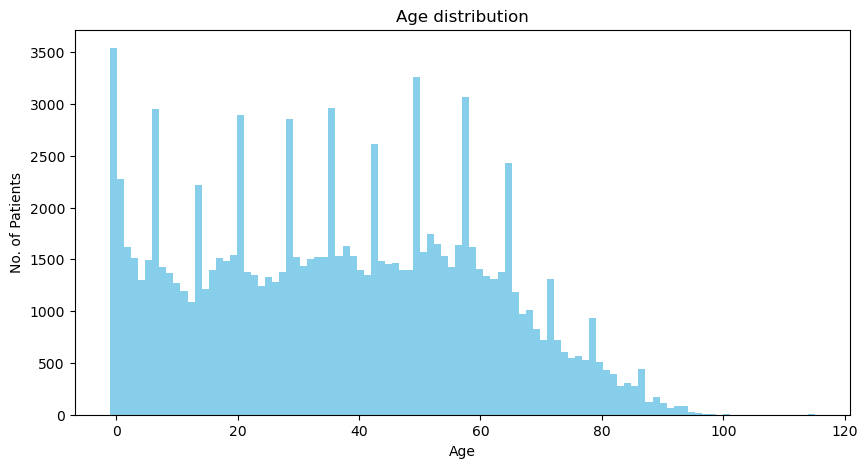

In [12]:
#Age distribution 
plt.figure(figsize=(10,5))
plt.hist(data['Age'],bins=100,color='skyblue')
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("No. of Patients")
plt.show()

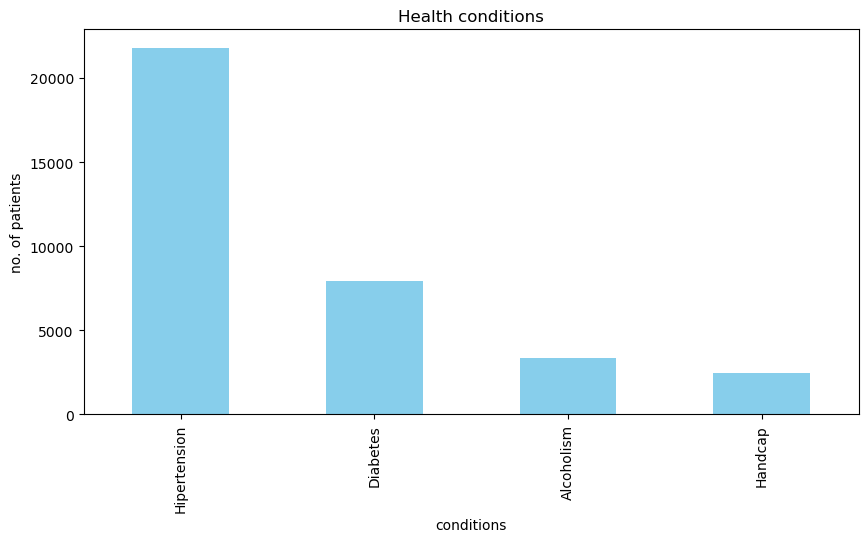

In [14]:
#Health conditions
conditions=['Hipertension','Diabetes','Alcoholism','Handcap']
condition_counts=data[conditions].sum()

plt.figure(figsize=(10,5))
condition_counts.plot(kind='bar',color='skyblue')
plt.title("Health conditions")
plt.xlabel("conditions")
plt.ylabel("no. of patients")
plt.show()

<Figure size 1000x500 with 0 Axes>

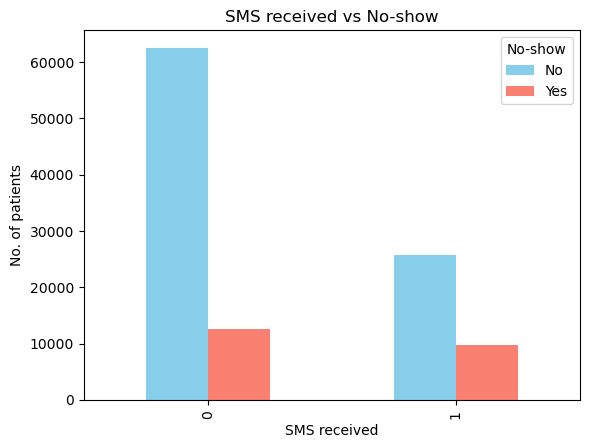

In [16]:
#SMS received and No-show
sms_noshow=data.groupby(['SMS_received','No-show']).size().unstack()

plt.figure(figsize=(10,5))
sms_noshow.plot(kind='bar',color=['skyblue','salmon'])
plt.title("SMS received vs No-show")
plt.xlabel("SMS received")
plt.ylabel("No. of patients")
plt.show()

In [17]:
df=data.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1)

In [18]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [22]:
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Neighbourhood']=label_encoder.fit_transform(df['Neighbourhood'])
df['No-show']=label_encoder.fit_transform(df['No-show'])

In [23]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,62,39,0,1,0,0,0,0,0
1,1,56,39,0,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0,0


In [24]:
#divide the data into dependent and independent variables
x=df.drop(['No-show'],axis=1)
y=df['No-show']

In [39]:
#splitting the data into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.77)

In [40]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [41]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_hat=logmodel.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_hat,y_test)

In [44]:
print(ac)

0.7985209660923609


In [45]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [46]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_tree=tree.predict(x_test)

In [48]:
ac=accuracy_score(y_tree,y_test)

In [49]:
print(ac)

0.7613484383604752


In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_rfc=rfc.predict(x_test)

In [53]:
ac=accuracy_score(y_rfc,y_test)

In [55]:
print(ac)

0.7615057823932028


In [56]:
from sklearn.svm import SVC
svc=SVC()

In [57]:
svc.fit(x_train,y_train)

SVC()

In [58]:
svc_pred=svc.predict(x_test)

In [59]:
ac=accuracy_score(svc_pred,y_test)

In [60]:
print(ac)

0.7985209660923609
